# Mutli Arm Bandit

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class MultiArmedBandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)  # Number of times each arm has been pulled
        self.values = np.zeros(n_arms)  # Estimated value of each arm
        self.total_rewards = np.zeros(n_arms)  # Total rewards for each arm

    def select_arm(self):
        # Use an epsilon-greedy exploration strategy
        epsilon = 0.1
        if random.random() > epsilon:
            return np.argmax(self.values)
        else:
            return random.randint(0, self.n_arms - 1)

    def update(self, chosen_arm, reward):
        # Increment the count and total reward for the chosen arm
        self.counts[chosen_arm] += 1
        self.total_rewards[chosen_arm] += reward
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Update the estimated value of the chosen arm
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value


In [3]:
# Simulate the bandit algorithm
n_arms = 3  # Number of different banners
bandit = MultiArmedBandit(n_arms)

# Simulated rewards (clicks) for each arm
true_conversion_rates = [0.05, 0.1, 0.15]
n_iterations = 1000

# Track cumulative rewards for plotting
cumulative_rewards = np.zeros((n_arms, n_iterations))

for i in range(n_iterations):
    chosen_arm = bandit.select_arm()
    reward = np.random.binomial(1, true_conversion_rates[chosen_arm])
    bandit.update(chosen_arm, reward)
    cumulative_rewards[:, i] = bandit.total_rewards

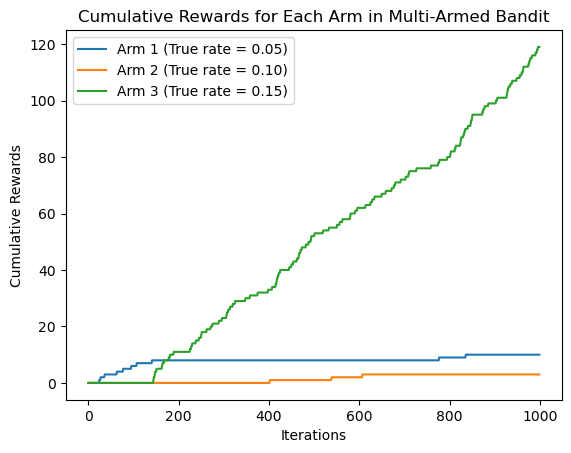

Estimated values: [0.06097561 0.09677419 0.14782609]
Arm selection counts: [164.  31. 805.]


In [4]:
# Plot cumulative rewards
for arm in range(n_arms):
    plt.plot(cumulative_rewards[arm], label=f'Arm {arm + 1} (True rate = {true_conversion_rates[arm]:.2f})')

plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.title('Cumulative Rewards for Each Arm in Multi-Armed Bandit')
plt.legend()
plt.show()

print("Estimated values:", bandit.values)
print("Arm selection counts:", bandit.counts)